[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alesaccoia/IULM_DDM2324_Notebooks/blob/main/05_statistica_descrittiva_in_python.ipynb)

# Statistica descrittiva in Python

Iniziamo con l'installazione e l'importazione delle librerie necessarie

In [2]:
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Campionamento e Misurazione
Per iniziare, supponiamo di avere dati sulla popolazione italiana relativa agli stipendi (espressi in migliaia di euro). Creeremo un set di dati simulato con 50.000 persone.

In [3]:
# Creazione del dataset della popolazione
np.random.seed(42)  # per riproducibilità
popolazione = pd.DataFrame({
    "Stipendio": np.random.normal(30, 5, 50000)  # media €30k, deviazione standard €5k
})


Estraiamo un campione casuale di 1000 persone da questa popolazione.

In [4]:
campione = popolazione.sample(1000)


## Funzioni utili
La funzione "describe" ci permette di ottenere informazioni (momenti statistici) circa le variabili numeriche del dataframe

In [5]:
campione.describe()

,Stipendio
count,1000.000000
mean,30.193723
std,4.931277
min,14.776717
25%,26.945501
50%,30.247371
75%,33.466671
max,45.662173


La funzione info invece ci dice informazioni sulla struttura del dataframe in sé

In [6]:
campione.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 32308 to 46615
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stipendio  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


## Variabili, Parametri e Statistiche
Calcoliamo media e deviazione standard per la popolazione e per il campione.

In [7]:
media_popolazione = popolazione['Stipendio'].mean()
std_popolazione = popolazione['Stipendio'].std()

media_campione = campione['Stipendio'].mean()
std_campione = campione['Stipendio'].std()


## Distribuzione di Frequenze

### Variabili Categoriche
Supponiamo che la popolazione abbia anche una variabile categorica: "Stato Civile". Generiamo dei dati simulati.

In [8]:
stati_civili = ["Single", "Sposato/a", "Divorziato/a", "Vedovo/a"]
popolazione["Stato Civile"] = np.random.choice(stati_civili, size=50000, p=[0.4, 0.4, 0.1, 0.1])

# Estraiamo lo stato civile per il nostro campione
campione = popolazione.sample(1000)

# Calcoliamo la distribuzione di frequenza per il campione
frequenza_stato_civile = campione["Stato Civile"].value_counts()
percentuale_stato_civile = campione["Stato Civile"].value_counts(normalize=True) * 100


### Variabili Numeriche
Creiamo un istogramma per gli stipendi del nostro campione.

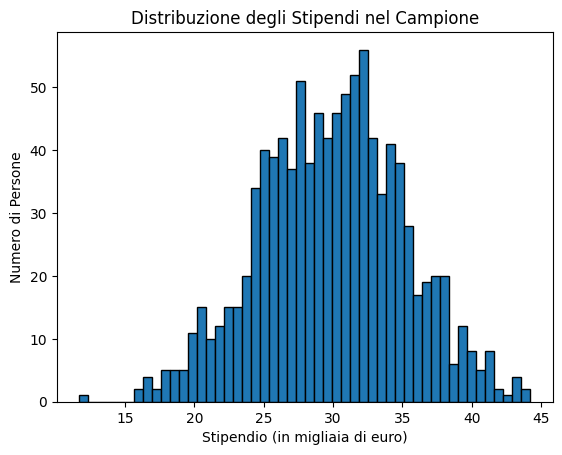

In [9]:
campione["Stipendio"].hist(bins=50, edgecolor="k")
plt.xlabel("Stipendio (in migliaia di euro)")
plt.ylabel("Numero di Persone")
plt.title("Distribuzione degli Stipendi nel Campione")
plt.grid(False)
plt.show()


# Misure di Tendenza Centrale e Dispersione

Calcoliamo media, mediana, moda, gamma, varianza e deviazione standard per gli stipendi nel nostro campione.

In [10]:
media = campione["Stipendio"].mean()
mediana = campione["Stipendio"].median()
moda = campione["Stipendio"].mode()[0]  # prendiamo il primo valore in caso ci siano più mode
gamma = campione["Stipendio"].max() - campione["Stipendio"].min()
varianza = campione["Stipendio"].var()
dev_standard = campione["Stipendio"].std()

# Regola Empirica

Utilizzando la regola empirica per una distribuzione normale:

In [11]:
# Calcolo degli intervalli
one_std_right = media + (1 * dev_standard)
one_std_left = media - (1 * dev_standard)
two_std_right = media + (2 * dev_standard)
two_std_left = media - (2 * dev_standard)
three_std_right = media + (3 * dev_standard)
three_std_left = media - (3 * dev_standard)

# Calcolo delle percentuali di dati entro ciascun intervallo
within_one_std = campione["Stipendio"].apply(lambda x: one_std_left < x < one_std_right).mean()
within_two_std = campione["Stipendio"].apply(lambda x: two_std_left < x < two_std_right).mean()
within_three_std = campione["Stipendio"].apply(lambda x: three_std_left < x < three_std_right).mean()
